# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# import dependencies
from citipy import citipy
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import requests
import json
import datetime as dt

from api_keys import weather_api_key



## Generate Cities List

In [2]:
# create lists for the latitudes and logitudes generated, and the cities returned
lat_lon = []        
cities = []


In [3]:
# Create random latitudes and logitudes to look up cities
lat = np.random.uniform(low=-90, high=90, size=10)
lon = np.random.uniform(low=-180, high=180, size=10)
lat_lon = zip(lat, lon)
lat_lon

In [4]:
# Create the city list
for lat_lon in lat_lon:

    # Nearest city to the generated lat_lon
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

    # If unique, add to cities
    if city not in cities:
        cities.append(city)

# Check cities returned
cities

['banting',
 'vaini',
 'fort-shevchenko',
 'hermanus',
 'busselton',
 'ushuaia',
 'upernavik',
 'half moon bay',
 'palabuhanratu',
 'mount isa']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# Create API key
url = 'http://api.openweathermap.org/data/2.5/weather?&units=metric'



In [21]:
# Counter for cities 
number = 1

# Create lists to hold data as called
city_name = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_sp = []



In [22]:
# Begin the api call
for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city +'&appid=' + weather_api_key)).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lon.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_sp.append(city_data['wind']['speed'])

        print(f'Processing record {number} of {len(cities)}. | {city}')

        number += 1


    except KeyError:
        print(f'City not found. Skipping {city}...')
        # number = number + 1


Processing record 0 of 10. | banting
Processing record 1 of 10. | vaini
Processing record 2 of 10. | fort-shevchenko
Processing record 3 of 10. | hermanus
Processing record 4 of 10. | busselton
Processing record 5 of 10. | ushuaia
Processing record 6 of 10. | upernavik
Processing record 7 of 10. | half moon bay
City not found. Skipping palabuhanratu...
Processing record 8 of 10. | mount isa


In [16]:
city_name

['Banting',
 'Vaini',
 'Fort-Shevchenko',
 'Hermanus',
 'Busselton',
 'Ushuaia',
 'Upernavik',
 'Half Moon Bay',
 'Mount Isa']

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# Create dataframe
city_data_df = pd.DataFrame({'City': city_name,
                                'Latitude': lat,
                                'Longitude': lon, 
                                'Temperature': temp,
                                'Humidity': humidity,
                                'Cloudiness': cloudiness, 
                                'Wind Speed': wind_sp})

#pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Banting,2.8167,101.5000,24.00,100,40,1.64
1,Vaini,-21.2000,-175.2000,24.00,94,90,5.14
2,Fort-Shevchenko,44.5086,50.2630,15.25,54,100,7.05
3,Hermanus,-34.4187,19.2345,17.78,88,93,3.13
4,Busselton,-33.6500,115.3333,14.44,97,7,1.88


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
above_100 = city_data_df.Humidity > 100
above_100

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: Humidity, dtype: bool

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

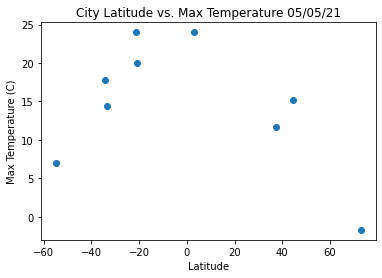

In [42]:
# Call the cate
date = dt.datetime.today().strftime('%d/%m/%y')

# Plot temperature
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'])
plt.title(f'City Latitude vs. Max Temperature {date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig('lat_temp.png')

## Latitude vs. Humidity Plot

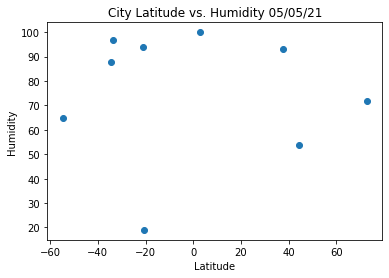

In [45]:
# Plot humidity
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity {date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('lat_humidity.png')

## Latitude vs. Cloudiness Plot

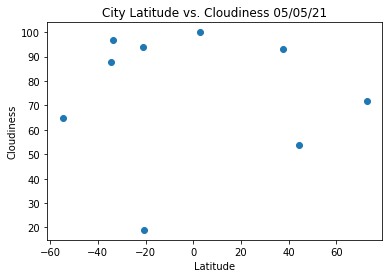

In [46]:
# Plot cloudiness
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Cloudiness {date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('lat_cloudiness.png')

## Latitude vs. Wind Speed Plot

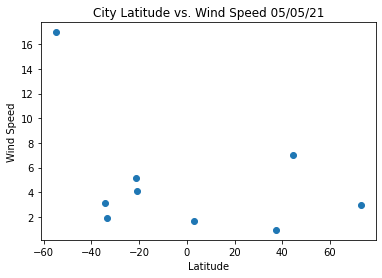

In [47]:
# Plot wind speed
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed {date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('lat_wind_speed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


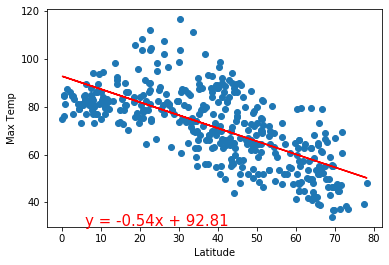

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


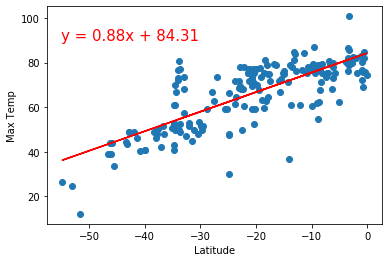

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


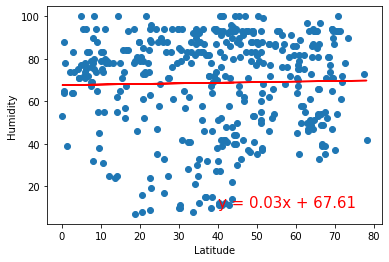

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


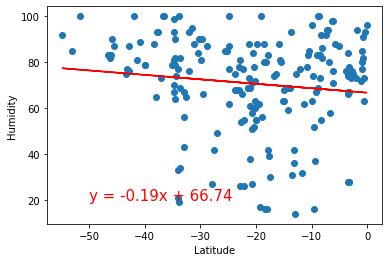

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


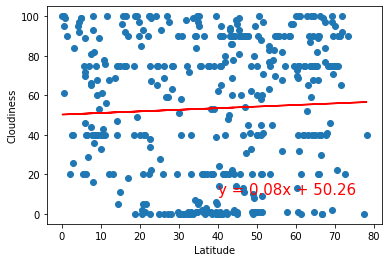

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


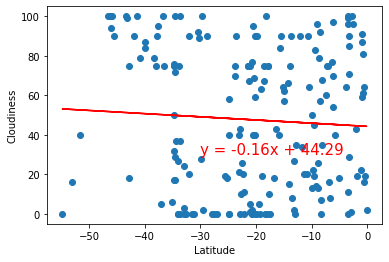

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


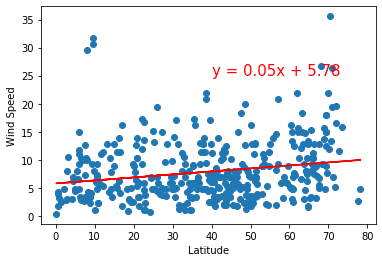

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


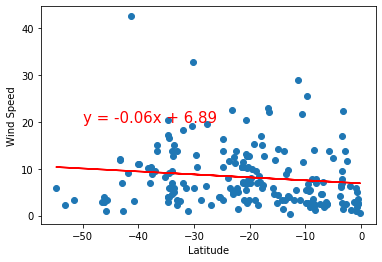